In [25]:
import pandas as pd


In [26]:
df=pd.read_csv('../data/raw/personal_transactions.csv')
df.head()


,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [27]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
)
df.columns

Index(['date', 'description', 'amount', 'transaction_type', 'category',
       'account_name'],
      dtype='object')

In [28]:
df['date'] = pd.to_datetime(df['date'])
df

,date,description,amount,transaction_type,category,account_name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card
...,...,...,...,...,...,...
801,2019-09-27,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,2019-09-28,BP,33.46,debit,Gas & Fuel,Platinum Card
803,2019-09-28,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,2019-09-30,Starbucks,1.75,debit,Coffee Shops,Platinum Card


In [29]:
df.isnull().sum()


date                0
description         0
amount              0
transaction_type    0
category            0
account_name        0
dtype: int64

In [30]:
df[df['amount'] < 0].head()

,date,description,amount,transaction_type,category,account_name


In [31]:
df['category'].value_counts()

category
Credit Card Payment       143
Groceries                 105
Restaurants                81
Utilities                  63
Shopping                   60
Gas & Fuel                 52
Paycheck                   46
Home Improvement           36
Coffee Shops               31
Alcohol & Bars             25
Internet                   21
Mortgage & Rent            21
Mobile Phone               21
Music                      21
Movies & DVDs              18
Auto Insurance             18
Fast Food                  16
Haircut                    13
Television                  8
Electronics & Software      4
Food & Dining               2
Entertainment               1
Name: count, dtype: int64

In [32]:
#transaction over time
df.set_index('date').resample('ME').size()


date
2018-01-31    32
2018-02-28    33
2018-03-31    43
2018-04-30    48
2018-05-31    40
2018-06-30    43
2018-07-31    39
2018-08-31    33
2018-09-30    39
2018-10-31    38
2018-11-30    43
2018-12-31    51
2019-01-31    28
2019-02-28    35
2019-03-31    34
2019-04-30    38
2019-05-31    34
2019-06-30    32
2019-07-31    42
2019-08-31    40
2019-09-30    41
Freq: ME, dtype: int64

In [33]:
#monthly spending 
monthly_spend = (
    df[df['transaction_type'] == 'debit']
    .set_index('date')
    .resample('M')['amount']
    .sum()
)

monthly_spend.head()


C:\Users\kk061\AppData\Local\Temp\ipykernel_11736\1225866343.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['amount']


date
2018-01-31     2931.45
2018-02-28     3165.05
2018-03-31     3500.16
2018-04-30     6029.54
2018-05-31    11392.03
Freq: ME, Name: amount, dtype: float64

In [34]:
import matplotlib.pyplot as plt

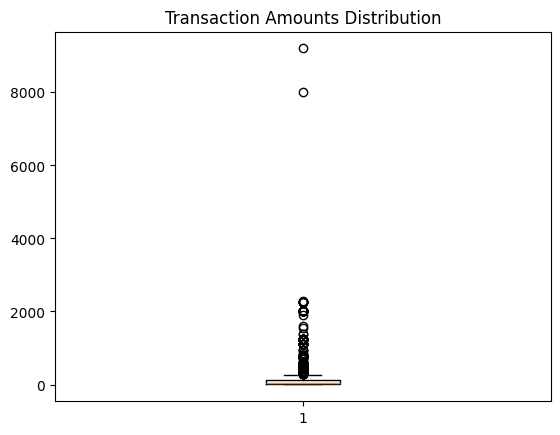

In [35]:
plt.boxplot(df['amount'])
plt.title('Transaction Amounts Distribution')
plt.show()

In [36]:
df

,date,description,amount,transaction_type,category,account_name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card
...,...,...,...,...,...,...
801,2019-09-27,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,2019-09-28,BP,33.46,debit,Gas & Fuel,Platinum Card
803,2019-09-28,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,2019-09-30,Starbucks,1.75,debit,Coffee Shops,Platinum Card


In [37]:
df.to_csv("../data/processed/transactions_clean.csv", index=False)
